## Page View Time Series Visualizer

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.

In [66]:
df_ori = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')
# parse_dates is used to take only year and month from the date format

df = df_ori.copy()    # copying the file, so that the original file will not be modified

display(df)

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


#### Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [67]:
df = df[(df['value'] >= df['value'].quantile(0.025)) &
             (df['value'] <= df['value'].quantile(0.975))]

display(df)

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [68]:
# We can also remove some data using df.drop()

df_clean2 = df_ori.drop(df_ori[(df_ori['value'] < df_ori['value'].quantile(0.025)) | (df_ori['value'] > df_ori['value'].quantile(0.975))].index)

display(df_clean2)

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


#### Create a `draw_line_plot` function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

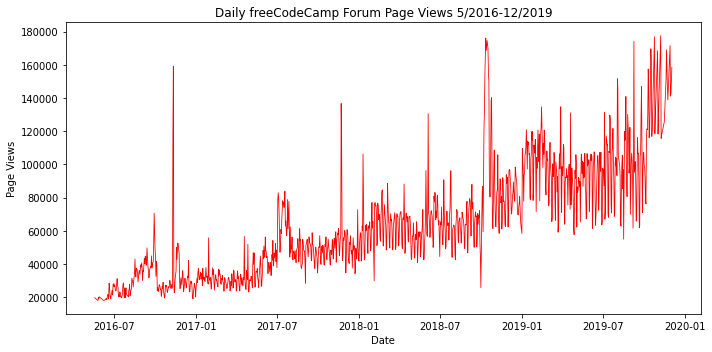

In [69]:
fig, ax = plt.subplots(figsize=(10,5))

fig.set_facecolor("white")       # set background color

ax.plot(df.index, df['value'], color='red', linewidth=0.8)
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")

fig.savefig('line_plot.png')


#### Create a `draw_bar_plot` function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

In [70]:
df_bar = df.copy()
df_bar['month'] = df_bar.index.month
df_bar['year'] = df_bar.index.year
df_bar = df_bar.groupby(['year', 'month'])['value'].mean()
df_bar = df_bar.unstack()    # Pivot a level of the (necessarily hierarchical) index labels.

display(df_bar)

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


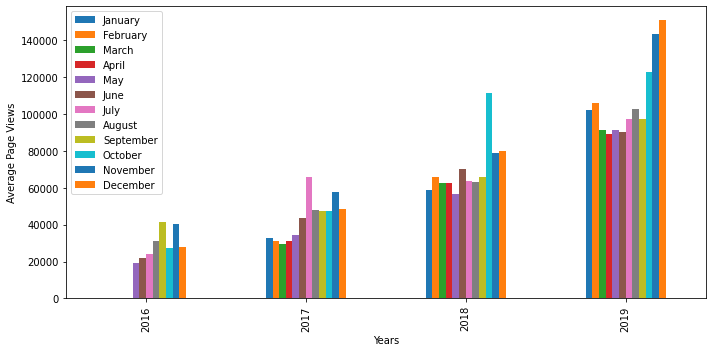

In [71]:
fig.set_facecolor("white") 

fig = df_bar.plot.bar(legend=True, xlabel='Years', ylabel='Average Page Views', figsize=(10,5)).figure
plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

fig.savefig('bar_plot.png')

#### Create a draw_box_plot function that uses Searborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.


In [72]:
df_box = df.copy()
df_box.reset_index(inplace=True) 
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

display(df_box['year'])
display(df_box['month'])
# When inplace = True, the data is modified in place, which means it will return nothing and the dataframe is now updated. 
# When inplace = False, which is the default, then the operation is performed and it returns a copy of the object.
# The strftime() method takes one or more format codes as an argument and returns a formatted string based on it. 

0       2016
1       2016
2       2016
3       2016
4       2016
        ... 
1233    2019
1234    2019
1235    2019
1236    2019
1237    2019
Name: year, Length: 1238, dtype: int64

0       May
1       May
2       May
3       May
4       May
       ... 
1233    Nov
1234    Nov
1235    Nov
1236    Dec
1237    Dec
Name: month, Length: 1238, dtype: object

In [73]:
# sort the dataframe based on the order of months
df_box['month_num'] = df_box['date'].dt.month
df_box = df_box.sort_values('month_num')

display(df_box)

,date,value,year,month,month_num
210,2017-01-06,37353,2017,Jan,1
937,2019-01-06,94108,2019,Jan,1
936,2019-01-05,77897,2019,Jan,1
935,2019-01-04,94514,2019,Jan,1
934,2019-01-03,100710,2019,Jan,1
...,...,...,...,...,...
567,2017-12-29,72819,2017,Dec,12
566,2017-12-28,51018,2017,Dec,12
565,2017-12-27,43075,2017,Dec,12
201,2016-12-28,28424,2016,Dec,12


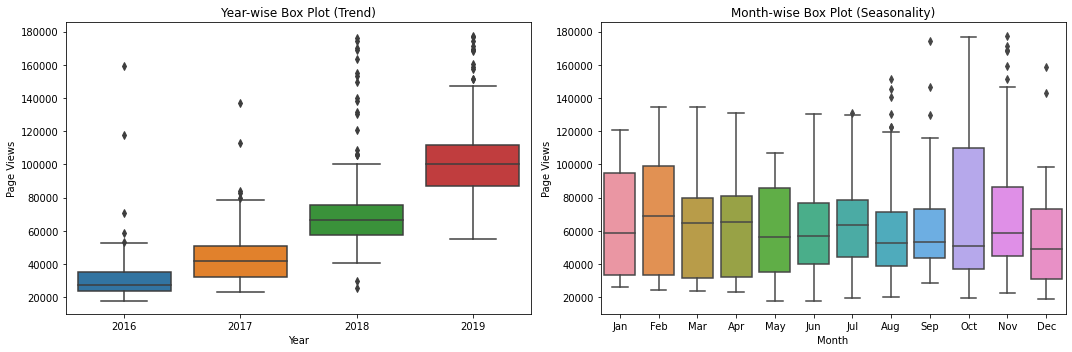

In [74]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

fig.set_facecolor("white") 

axs[0] = sns.boxplot(df_box['year'], df_box['value'], ax=axs[0])
axs[1] = sns.boxplot(df_box['month'], df_box['value'], ax=axs[1])

axs[0].set_title('Year-wise Box Plot (Trend)')
axs[1].set_title('Month-wise Box Plot (Seasonality)')

axs[0].set(xlabel='Year', ylabel='Page Views')
axs[1].set(xlabel='Month',  ylabel='Page Views')

fig.savefig('box_plot.png')